# 04_test_RF.ipynb

Bu notebook models klasöründe olan farklı hisseler için eğitilmiş RF modellerini yükler, test verisi üzerinde tahmin yapar, performanslarını hesaplar ve karşılaştırmalı grafikler ile sonuçları görselleştirir.

In [1]:
import os, sys

# proje kök dizinini; notebooks/ içinde olduğumuz için bir üst klasör olarak ayarlanacak
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
# ardından bunu system path'ine ekleyeceğiz
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [2]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
from sklearn.metrics import mean_squared_error, mean_absolute_error
from src.data_prep_rf import download_data, clean_data, add_technical_indicators, prepare_features_targets

## 1. Metrik Hesaplama Fonksiyonları

In [3]:
def compute_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)

    return {"MSE": mse, "RMSE": rmse, "MAE": mae}

def plot_predictions(y_true, y_pred, title="Gerçek ve Tahmin Edilen Değerler", figsize=(12,6)):
    # y_pred'in index'ini y_true ile eşitle
    if isinstance(y_true, pd.Series):
        y_pred = pd.Series(y_pred, index=y_true.index)
    elif isinstance(y_true, pd.DataFrame):
        y_pred = pd.Series(y_pred, index=y_true.index)

    plt.figure(figsize=figsize)
    plt.plot(y_true, label="Gerçek", linewidth=2)
    plt.plot(y_pred, label="Tahmin", alpha=0.7)
    plt.title(title)
    plt.xlabel("Zaman")
    plt.ylabel("Değer")
    plt.legend()
    plt.grid(True)
    plt.show()

## 3. Veriyi Hazırla

In [4]:
symbols = ['AAPL', 'MSFT', 'TSLA', 'GOOG']
test_start = '2023-01-01'
test_end = '2025-01-01'
results = []
N_DAYS_FUTURE = 30 # Kaç gün ileri tahmin edeceğiz

## 4. Tahmin ve Ölçek Geri Alımı


=== AAPL için işlemler başlıyor ===
--- AAPL test verisi hazırlanıyor ve değerlendiriliyor ---


/home/outro/vscode_projects/borsa-aslani/src/data_prep_rf.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start, end=end, progress=False)
/home/outro/vscode_projects/borsa-aslani/src/data_prep_rf.py:117: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = df.drop(columns=[target_col])


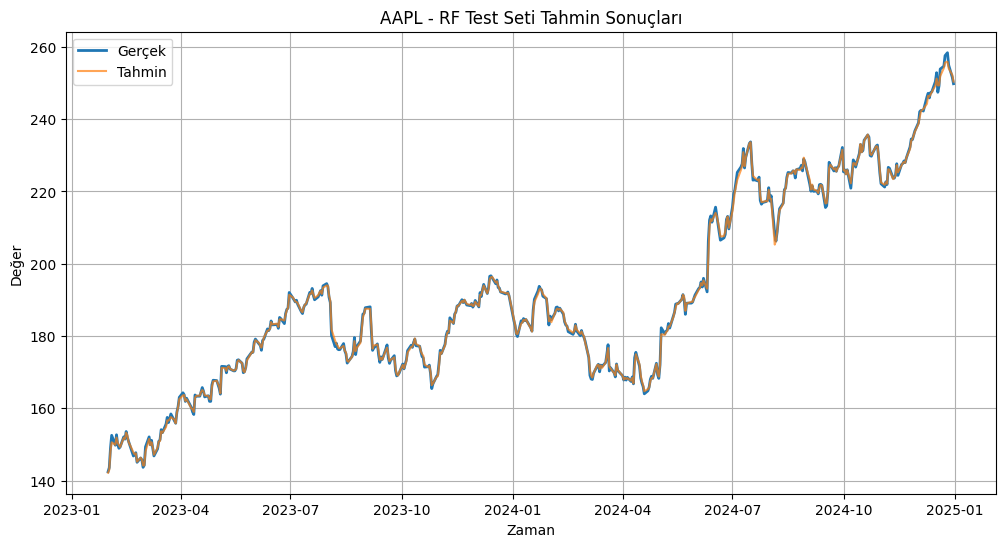


=== MSFT için işlemler başlıyor ===
--- MSFT test verisi hazırlanıyor ve değerlendiriliyor ---


/home/outro/vscode_projects/borsa-aslani/src/data_prep_rf.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start, end=end, progress=False)
/home/outro/vscode_projects/borsa-aslani/src/data_prep_rf.py:117: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = df.drop(columns=[target_col])


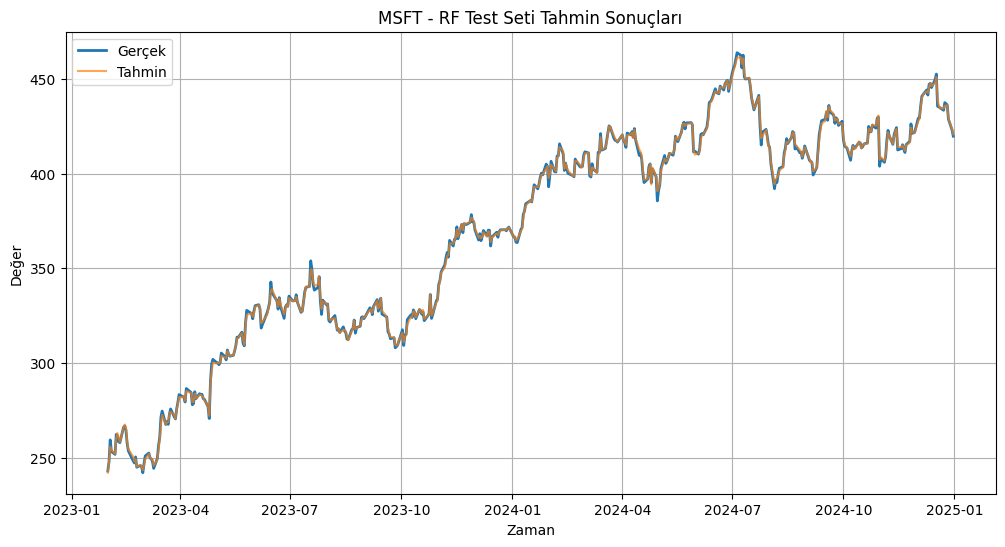


=== TSLA için işlemler başlıyor ===
--- TSLA test verisi hazırlanıyor ve değerlendiriliyor ---


/home/outro/vscode_projects/borsa-aslani/src/data_prep_rf.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start, end=end, progress=False)
/home/outro/vscode_projects/borsa-aslani/src/data_prep_rf.py:117: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = df.drop(columns=[target_col])


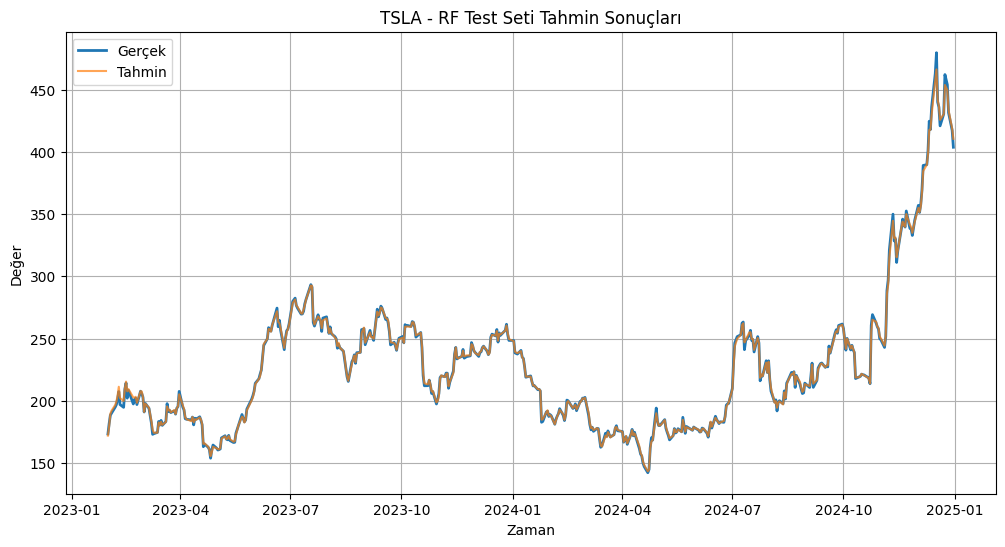


=== GOOG için işlemler başlıyor ===
--- GOOG test verisi hazırlanıyor ve değerlendiriliyor ---


/home/outro/vscode_projects/borsa-aslani/src/data_prep_rf.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start, end=end, progress=False)
/home/outro/vscode_projects/borsa-aslani/src/data_prep_rf.py:117: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = df.drop(columns=[target_col])


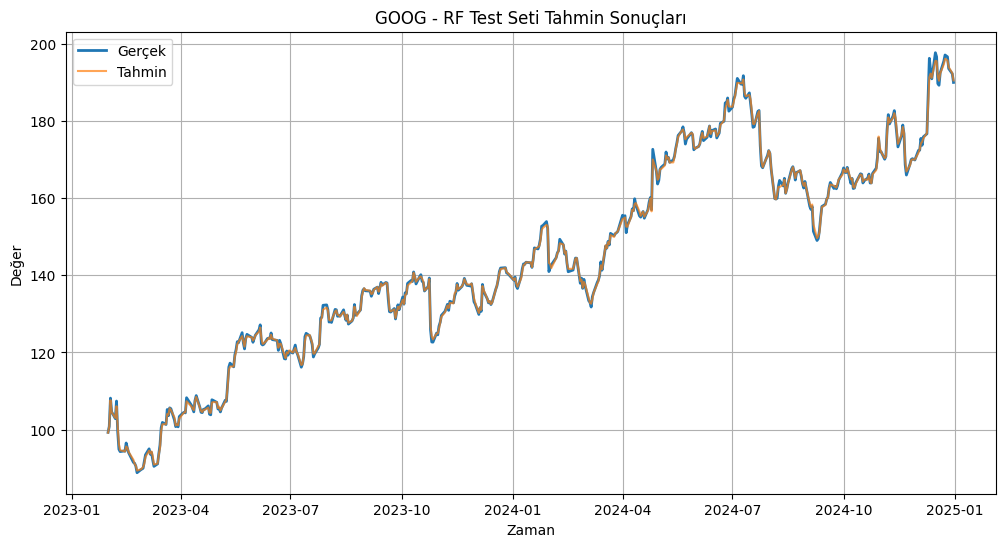

In [5]:
for sym in symbols:
    print(f"\n=== {sym} için işlemler başlıyor ===")

    print(f"--- {sym} test verisi hazırlanıyor ve değerlendiriliyor ---")
    df_test = download_data(sym, test_start, test_end)
    df_test = clean_data(df_test)
    df_test = add_technical_indicators(df_test)
    X_test, y_test = prepare_features_targets(df_test)

    rf_model_path = f"../models/rf_{sym}_best.joblib"
    rf_model = joblib.load(rf_model_path)
    
    if not X_test.empty:
        y_pred_rf = rf_model.predict(X_test)
        rf_metrics = compute_metrics(y_test, y_pred_rf)
        rf_metrics.update({"Model": f"RF_{sym}"})
        results.append(rf_metrics)
        plot_predictions(y_test, y_pred_rf, title=f"{sym} - RF Test Seti Tahmin Sonuçları")
    else:
        print(f"{sym} için test verisi oluşturulamadı.")

## 5. Performans Tablosu

In [6]:
results_df = pd.DataFrame(results)
print("\nModel Performans Tablosu:")
print(results_df.sort_values("RMSE"))


Model Performans Tablosu:
        MSE      RMSE       MAE    Model
3  0.361985  0.601652  0.424485  RF_GOOG
0  0.401927  0.633977  0.446819  RF_AAPL
1  1.458604  1.207727  0.907229  RF_MSFT
2  2.814751  1.677722  1.081612  RF_TSLA
